# Gender Prediction using Survey Dataset

#### Survey conducted in 2013 so as to understand the preferences of young individuals of Slovakian nationality. The survey asked its participants a range of questions such as music and movie preference, phobia, spending habit etc.

#### Based on the available data gender based analysis and predictions can be made. The data recorded in the survey can be used to get interesting insights with repsect to movie preferences, personaliy traits of teenage males and females may be drawn. 

In [200]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import warnings
from IPython.display import display

%matplotlib inline

In [201]:
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 200)

In [202]:
raw_data=pd.read_csv("responses.csv")       ## Reading Dataset

In [203]:
raw_data.info()      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [204]:
raw_data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569


## Data preparation

#### The dataset consist of categorical variables/columns with specific responses in the form of string value. The categorical values are assigned numerical values for Machine learning

In [205]:
#formatting string data for modeling
raw_data['Gender'] = pd.get_dummies(raw_data['Gender'])
raw_data['Left - right handed']  = pd.get_dummies(raw_data['Left - right handed'])
raw_data['Only child'] = pd.get_dummies(raw_data['Only child'])
raw_data['Village - town'] = pd.get_dummies(raw_data['Village - town'])
raw_data['House - block of flats'] = pd.get_dummies(raw_data['House - block of flats'])
raw_data['Education'] = pd.get_dummies(raw_data['Education'])
raw_data['Internet usage'] = pd.get_dummies(raw_data['Internet usage'])
raw_data['Punctuality'] = pd.get_dummies(raw_data['Punctuality'])
raw_data['Lying'] = pd.get_dummies(raw_data['Lying'])
raw_data['Smoking'] = pd.get_dummies(raw_data['Smoking'])
raw_data['Alcohol'] = pd.get_dummies(raw_data['Alcohol'])


Checking for null values and preprocessing data before running analysis 

In [206]:
raw_data.isnull().sum()

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

Replacing the null values in the dataset with median value of the column

In [207]:
data = pd.DataFrame()
for names in raw_data.columns:
    data[names] = raw_data[names].fillna(raw_data[names].median())

In [208]:
raw_data.isnull().sum()

Music                          3
Slow songs or fast songs       2
Dance                          4
Folk                           5
Country                        5
Classical music                7
Musical                        2
Pop                            3
Rock                           6
Metal or Hardrock              3
Punk                           8
Hiphop, Rap                    4
Reggae, Ska                    7
Swing, Jazz                    6
Rock n roll                    7
Alternative                    7
Latino                         8
Techno, Trance                 7
Opera                          1
Movies                         6
Horror                         2
Thriller                       1
Comedy                         3
Romantic                       3
Sci-fi                         2
War                            2
Fantasy/Fairy tales            3
Animated                       3
Documentary                    8
Western                        4
          

The dataset has 150 columns. Spliting the dataset into different groups for further analysis.
The grouped columns under a Pands Dataframe can then be used according to the interest of analysis.

The dataset is split into following groups :
    1. Demograpgh(demograph)
    2. Personal information(person_info)
    3. Music intererest(music)
    4. Movies(movies)
    5. Hobbies and Interests(hoby_inter)
    6. Phobia(phobia)
    7. Healthy habits(health_habit)
    8.Personality traits, views on life, & opinions(personality)
    9.Spending habits(spending)

In [209]:
demograph = data[["Age","Height","Weight","Gender"]].copy()

In [210]:
person_info = data[["Number of siblings", "Gender", "Left - right handed", "Education",
                        "Only child", "Village - town","House - block of flats"]].copy()

In [211]:
music = data[["Music","Slow songs or fast songs", "Dance", "Folk","Country","Classical music","Musical",
                    "Pop", "Rock", "Metal or Hardrock","Punk","Hiphop, Rap","Reggae, Ska","Swing, Jazz",
                    "Rock n roll", "Alternative", "Latino", "Techno, Trance", "Opera"]].copy()

In [212]:
movies = data[["Movies", "Horror", "Thriller", "Comedy", "Romantic", "Sci-fi",
                    "War", "Fantasy/Fairy tales","Animated","Documentary","Western", "Action"]].copy()

In [213]:
hoby_inter = data.loc[:, "History":"Pets"].copy()

In [214]:
phobia= data.loc[:, "Flying":"Fear of public speaking"].copy()

In [215]:
health_habit = data[["Smoking","Alcohol","Healthy eating"]].copy()

In [216]:
personality = data.loc[:, "Daily events":"Internet usage"].copy()

In [217]:
spending = data.loc[:, "Finances":"Spending on healthy eating"].copy()

### Correlation analysis

Finding correlation data will help to decide the groups that will be most usefull in prediction algorithms.


Correlation between music preferences, gender, and age. The correlation coefficients are stacked and arranged in the descending order. The heat map following the stack aids to understand the correalation between data.

In [218]:
gender_age_music = data[["Gender", "Age"]].copy()
gender_age_music = gender_age_music.join([music])
corr = gender_age_music.corr()

Text(0.5,1,'Music preferences')

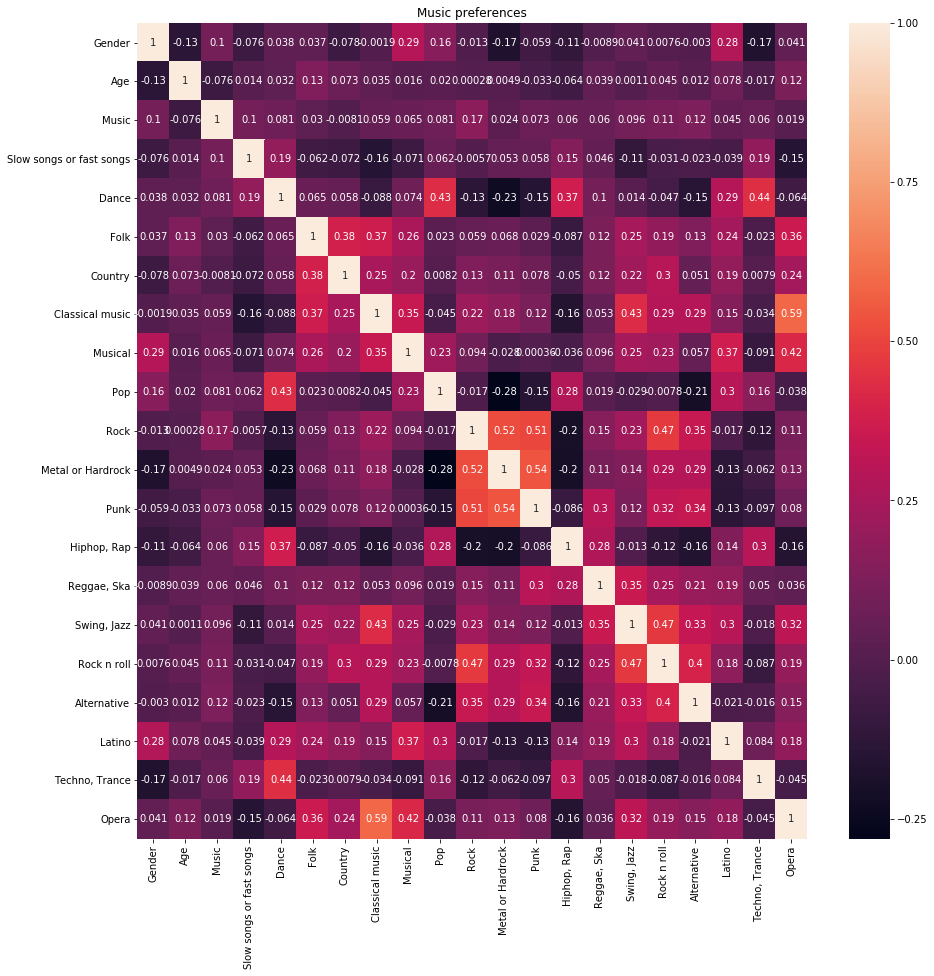

In [219]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True)
plt.title('Music preferences')

In [220]:
observe_music = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(observe_music.head(20))
print("\n")
print(observe_music.tail(10))

Classical music    Opera                0.593821
Metal or Hardrock  Punk                 0.543174
Rock               Metal or Hardrock    0.522569
                   Punk                 0.506675
                   Rock n roll          0.471190
Swing, Jazz        Rock n roll          0.465791
Dance              Techno, Trance       0.438131
                   Pop                  0.431504
Classical music    Swing, Jazz          0.428861
Musical            Opera                0.415834
Rock n roll        Alternative          0.399434
Folk               Country              0.384635
Musical            Latino               0.372047
Dance              Hiphop, Rap          0.371448
Folk               Classical music      0.368695
                   Opera                0.359286
Reggae, Ska        Swing, Jazz          0.353088
Classical music    Musical              0.348918
Rock               Alternative          0.348206
Punk               Alternative          0.344925
dtype: float64


Hip

Following observation can be made from the correlation values :

- People who like classical music also like listening to Opera
- Similarly there is some assosiation between Rock, Punck, and Metal
- The relationship between the variables on interest 'Gender' is feable and is between Techno and Metal

##### Correlation between spending habits, gender and age

In [221]:
gender_age_spending = data[["Gender", "Age"]].copy()
gender_age_spending = gender_age_spending.join([spending])
corr_spending = gender_age_spending.corr()

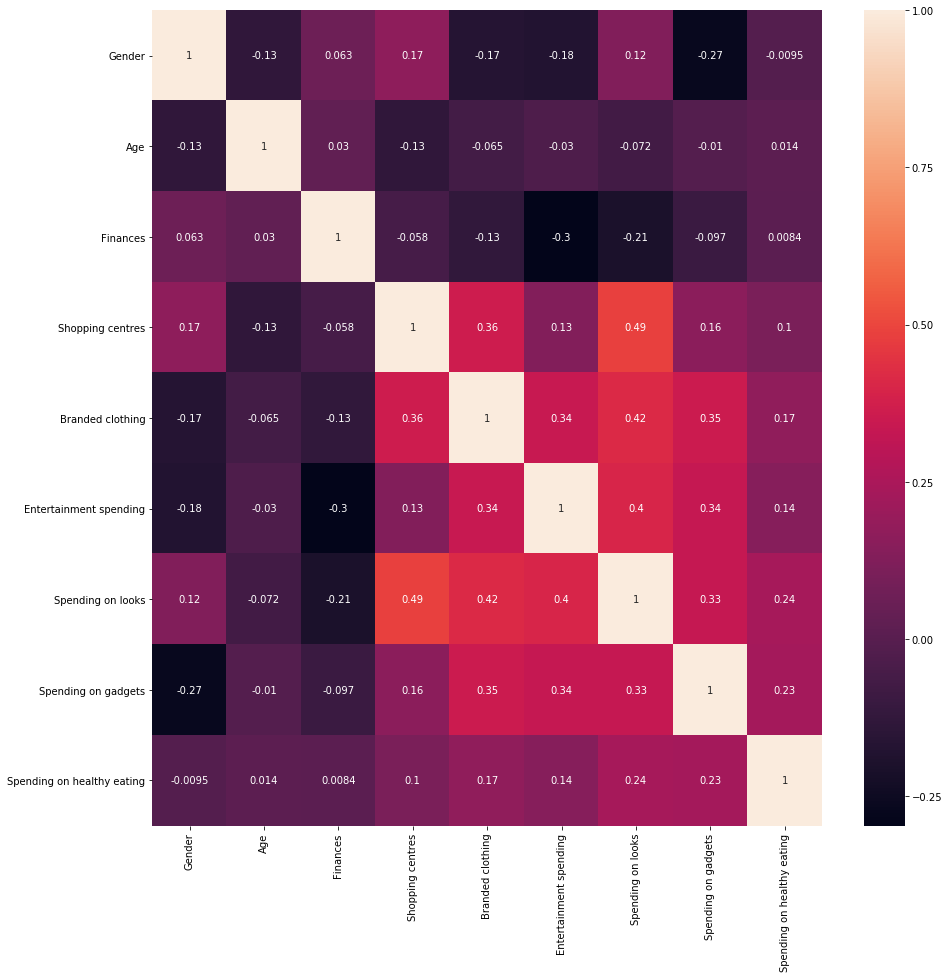

In [222]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_spending, annot=True)

In [223]:
observe_spending = (corr_spending.where(np.triu(np.ones(corr_spending.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(observe_spending.head(20))
print("\n")
print(observe_spending.tail(10))

Shopping centres        Spending on looks             0.487785
Branded clothing        Spending on looks             0.416188
Entertainment spending  Spending on looks             0.401925
Shopping centres        Branded clothing              0.360864
Branded clothing        Spending on gadgets           0.352606
                        Entertainment spending        0.337584
Entertainment spending  Spending on gadgets           0.336085
Spending on looks       Spending on gadgets           0.333790
                        Spending on healthy eating    0.235274
Spending on gadgets     Spending on healthy eating    0.234421
Branded clothing        Spending on healthy eating    0.173396
Gender                  Shopping centres              0.168102
Shopping centres        Spending on gadgets           0.155571
Entertainment spending  Spending on healthy eating    0.143333
Shopping centres        Entertainment spending        0.131721
Gender                  Spending on looks             0

As seen from the correlation values 
- People spending on looks like to also spend on buying branded clothing, entertaintment and shopping centres
- Gender based spending habits can only be seen in columns spending on looks, branded clothing and entertaintment

##### Correlation between Movies , Gender aand age

In [224]:
movies_gender_age = movies.join([data["Gender"],data["Age"]])
corr_movies = movies_gender_age.corr()


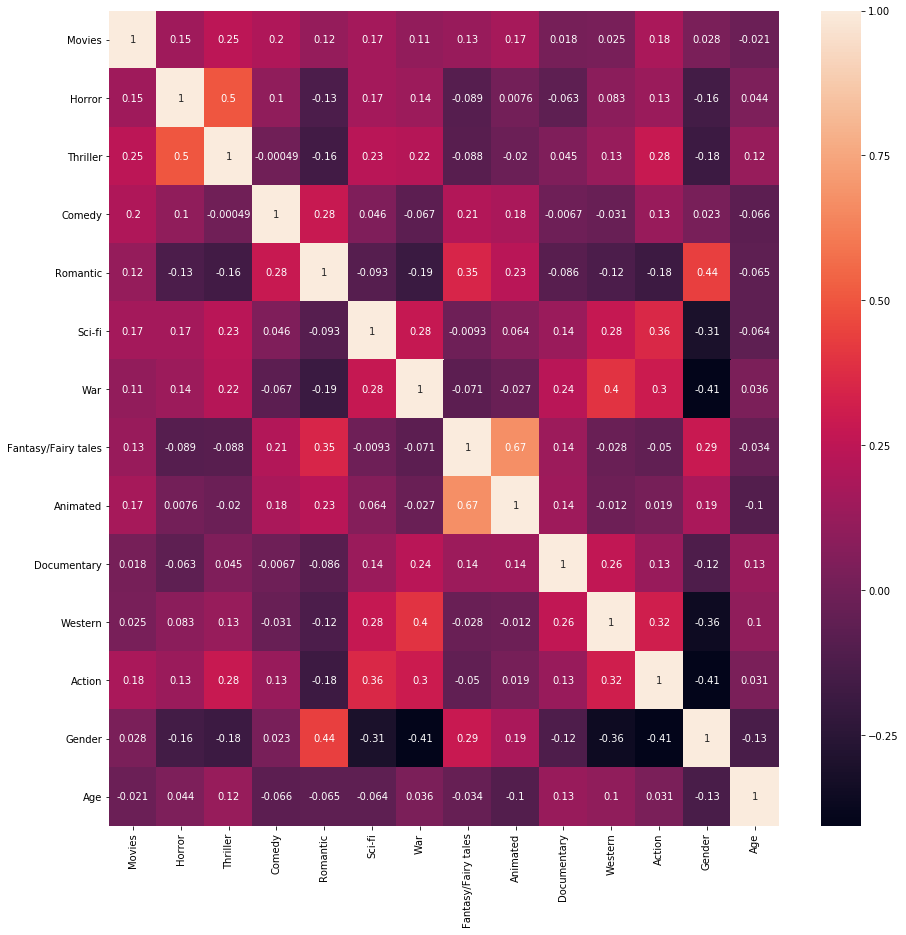

In [225]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr_movies, annot=True)

In [226]:
observe_movies = (corr_movies.where(np.triu(np.ones(corr_movies.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
# print(observe_music)
print(observe_movies.head(20))
print("\n")
# observe_music.sort_values(ascending=True)
print(observe_movies.tail(10))

Fantasy/Fairy tales  Animated               0.673745
Horror               Thriller               0.504835
Romantic             Gender                 0.436006
War                  Western                0.397073
Sci-fi               Action                 0.360460
Romantic             Fantasy/Fairy tales    0.346052
Western              Action                 0.318275
War                  Action                 0.301214
Fantasy/Fairy tales  Gender                 0.289765
Comedy               Romantic               0.283225
Thriller             Action                 0.281044
Sci-fi               Western                0.277930
                     War                    0.275253
Documentary          Western                0.260940
Movies               Thriller               0.245984
War                  Documentary            0.235531
Romantic             Animated               0.234875
Thriller             Sci-fi                 0.233777
                     War                    0.

Following inference can be drawn from the correlation values :
- There is a strong association between movies with similar genre (Fantasy/Fairy tales and Animated , Horror and Thriller etc)
- Gender has association between Romantic, Sci-fi, Western, War, Action movies
- Women like more Romatic movies as compared to men. Men like Sci-fi, Action, War movies

Correlation between between hobbies and interestes, Gender, Age, Education

In [227]:
hoby_inter_gender = hoby_inter.join([data["Gender"], data["Age"], data["Education"],data["Only child"]])
corr = hoby_inter_gender.corr(method='spearman')
observe = (corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(observe.head(20))
print(observe.tail(10))

Biology             Medicine                  0.684997
                    Chemistry                 0.650752
Mathematics         Physics                   0.581235
Chemistry           Medicine                  0.569343
Art exhibitions     Theatre                   0.530306
Celebrities         Shopping                  0.478777
Reading             Theatre                   0.472711
Internet            PC                        0.461082
Politics            Law                       0.438113
PC                  Science and technology    0.426047
Active sport        Adrenaline sports         0.410608
Physics             Science and technology    0.407418
History             Politics                  0.393006
Shopping            Gender                    0.384303
PC                  Cars                      0.379326
Reading             Art exhibitions           0.377518
Art exhibitions     Writing                   0.365819
Economy Management  Law                       0.364001
Physics   

Following observation can be made from the values :
- As the expeceted there is strong correlation between related fields of interest such as Biology and Medicine, Mathematics and Physics etc.
- The Gender column is correlated with Shopping, Reading, Active Sport, Physics, Science and technology, Cars and PC

##### Correlation between demographic information,age and  health habits

In [228]:
person_info_health_habit = person_info.join([data["Age"],health_habit])
corr1 = person_info_health_habit.corr(method='spearman')
observe1 = (corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(observe1.head(10))
print(observe1.tail(10))


Village - town          House - block of flats    0.590650
Number of siblings      Only child                0.543146
Smoking                 Alcohol                   0.223494
Education               Age                       0.195807
Only child              Age                       0.094935
Village - town          Alcohol                   0.091826
Number of siblings      Left - right handed       0.078355
Left - right handed     Healthy eating            0.070833
House - block of flats  Alcohol                   0.064233
Gender                  Healthy eating            0.061033
dtype: float64
Education            House - block of flats   -0.038995
Left - right handed  Alcohol                  -0.041442
Only child           Village - town           -0.043709
Gender               Left - right handed      -0.082450
Alcohol              Healthy eating           -0.087900
Number of siblings   House - block of flats   -0.096183
                     Village - town           -0.109383
Smo

##### Correlation between demograph information and phobia

In [229]:
person_info_phobia=person_info.join([phobia, demograph.drop("Gender", axis=1)])
corr3 = person_info_phobia.corr(method='spearman')
observe3 = (corr3.where(np.triu(np.ones(corr3.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(observe3.head(20))
print(observe3.tail(10))


Height              Weight                    0.749105
Village - town      House - block of flats    0.590650
Snakes              Rats                      0.573873
Number of siblings  Only child                0.543146
Storm               Darkness                  0.502042
Spiders             Snakes                    0.440590
Rats                Dangerous dogs            0.414729
Snakes              Dangerous dogs            0.378280
Spiders             Rats                      0.376880
Flying              Storm                     0.353220
Storm               Snakes                    0.337907
Darkness            Spiders                   0.331535
Gender              Spiders                   0.329032
Storm               Rats                      0.323508
Gender              Darkness                  0.317284
                    Storm                     0.314442
Darkness            Rats                      0.304857
Storm               Dangerous dogs            0.297343
Darkness  

There little inference that can be drawn with respect to the Gender. Women tend to be more afraid of Darkness and Storm as  compared to men. 

##### As seen from the correlation data most of the correlationship exist between Gender and other data.
##### Among the correlation values found, the highest values are between hobbies and movie preferences.
##### Based on the correlation analysis of data, Machine learning algorithms can be used to make prediction of Gender with respect to Hobbies and interest, movie preferences. 

##### Will be using Logistic regression, Decison Trees, and Random Forest techinques for classification.

In [230]:
from sklearn.metrics import recall_score, precision_score
from sklearn.cross_validation import KFold, train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

## Logistic Regression

1. Predictor variables the hobbies and interest columns

In [231]:
# using hobies/interest
X = hoby_inter.dropna()
print(len(X))

1010


In [232]:
Y = raw_data["Gender"].copy()
print(len(Y))

1010


In [233]:
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, Y, test_size=.33, random_state=100)

In [234]:
# We will standardize variables to be sure that everything is on whie scale as it plays quite an important role 
# in regularization as we will apply logistic regression.

scaler = StandardScaler()
scaler.fit(x_train_log)
x_train_log=scaler.transform(x_train_log)
x_test_log=scaler.transform(x_test_log)

In [235]:
logmodel = LogisticRegression()

Will use the K fold cross validation along with grid search for parameter tuning.
This will help to increase the presicion of logistic regression model.

Grid search algorithm will give us best cost parameters(C) which will be passed to logistic regression model

In [236]:
KF = KFold(len(x_train_log), n_folds=8)
param_grid = {'C':[.001,.01,.03,.1,.3,1,3,10]}

In [237]:
grid_search = GridSearchCV(logmodel, param_grid=param_grid, cv=KF, scoring = 'f1')
grid_search.fit(x_train_log, y_train_log)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=676, n_folds=8, shuffle=False, random_state=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [238]:
logmodel = LogisticRegression(C=grid_search.best_params_['C'])

In [239]:
logmodel.fit(x_train_log, y_train_log)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [240]:
predict_log = logmodel.predict(x_test_log)

Using the classification report method we will be assesing the performance of the model

In [241]:
print(classification_report(y_test_log, predict_log))

             precision    recall  f1-score   support

          0       0.83      0.87      0.85       133
          1       0.91      0.89      0.90       201

avg / total       0.88      0.88      0.88       334



In [242]:
confusion_matrix(y_test_log, predict)

array([[116,  17],
       [ 22, 179]], dtype=int64)

##### As seen in the classification report with the current logistic regreession model we are able to get a precision on 88%

The parameters with highest coefficient values were as follows

In [243]:
logmodel_coeff = pd.DataFrame({'Features': X.columns,'Coeff': logmodel.coef_[0]})
logmodel_coeff.sort_values('Coeff',inplace=True)
logmodel_coeff.head(5)           #top 5 negetive coefficients

,Coeff,Features
6,-0.638887,PC
15,-0.620752,Cars
27,-0.448343,Science and technology
23,-0.402061,Active sport
0,-0.378820,History


##### The negative coefficients suggest the coeffiients were more responsible for predicting the Gender as 'Men/Male'. 
##### The same can be verified by looking at the count plot for the top three features against Gender column in the original data set

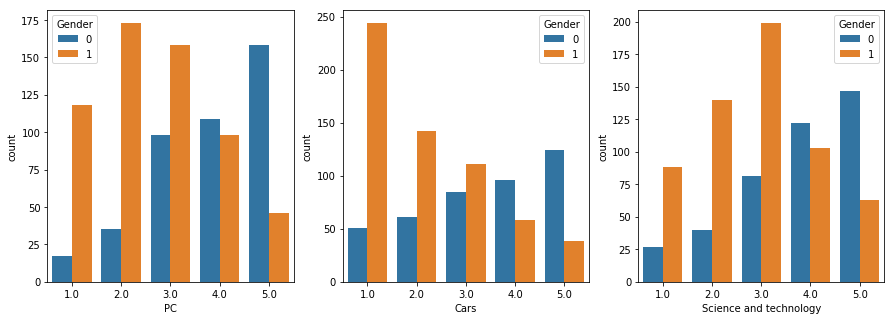

In [244]:
interest1 = data[["Gender","PC","Cars","Science and technology", "History", "Active sport"]].copy()
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5), sharex=True)
sns.countplot(x=interest1["PC"], hue="Gender", data=interest1, ax=ax[0])
sns.countplot(x=interest1["Cars"], hue="Gender", data=interest1, ax=ax[1])
sns.countplot(x=interest1["Science and technology"], hue="Gender", data=interest1, ax=ax[2])

In [245]:
logmodel_coeff.tail(5)       # top 5 positive coefficients 

,Coeff,Features
28,0.338805,Theatre
1,0.375209,Psychology
19,0.447841,Dancing
10,0.556623,Reading
26,0.619524,Shopping


##### The negative coefficients suggest the coeffiients were more responsible for predicting the Gender as 'Women/Female'. 
##### The same can be verified by looking at the count plot for the top three features against Gender column in the original data set

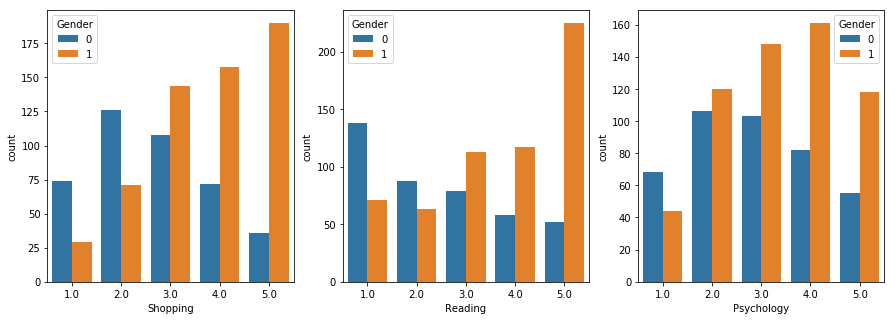

In [246]:
interest2 = raw_data[["Gender","Celebrities","Dancing","Psychology", "Reading", "Shopping"]].copy()
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5), sharex=True)
sns.countplot(x=interest2["Shopping"], hue="Gender", data=interest2, ax=ax[0])
sns.countplot(x=interest2["Reading"], hue="Gender", data=interest2, ax=ax[1])
sns.countplot(x=interest2["Psychology"], hue="Gender", data=interest2, ax=ax[2])

The presicion that can be achieved using the logistic regression is 85%.
Other binary classification techinique is decision tree to which will be passing the same scaled test train data so to check if we get imporved presision  

### Decision Trees

In [247]:
from sklearn.tree import DecisionTreeClassifier

In [248]:
dtree = DecisionTreeClassifier()

In [249]:
dtree.fit(x_train_log,y_train_log)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [250]:
predictions_dtree = dtree.predict(x_test_log)

In [251]:
print(classification_report(y_test_log, predictions_dtree))

             precision    recall  f1-score   support

          0       0.66      0.64      0.65       133
          1       0.77      0.78      0.77       201

avg / total       0.72      0.72      0.72       334



###### The presicion given by the decision tree classifier is much less compared to the logistic regression model.

### Random Forest

The third binary classification technique will be Random Forest technique.
Random Forest Technique is know to have better performance, as in having better accuracy when compared to the Decision Tree Technique

In [252]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train_log, y_train_log)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [253]:
rfc_pred = rfc.predict(x_test_log)

In [254]:
print(classification_report(y_test_log,rfc_pred))

             precision    recall  f1-score   support

          0       0.83      0.72      0.77       133
          1       0.83      0.90      0.86       201

avg / total       0.83      0.83      0.83       334



###### As expected the Random forest technique provided better presision in predicting the Gender values.
###### The model however did not score above the logistic regression model(88% precision)

### Support Vector Machines

SVM allows to capture much compless realationships between data points without the need for much of transformation. 

In [255]:
from sklearn.svm import SVC

In [256]:
svm_model = SVC()       

In [257]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split( X, Y, test_size=0.33, random_state=100)

In [258]:
svm_model.fit(X_train_svm, y_train_svm)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [259]:
predict_svm = svm_model.predict(X_test_svm)

In [260]:
print(classification_report(y_test_svm, predict_svm))

             precision    recall  f1-score   support

          0       0.84      0.80      0.82       133
          1       0.87      0.90      0.88       201

avg / total       0.86      0.86      0.86       334



The presision achieved with SVM is 86%

The higest precision was achieved using Logistic regression(88%) and SVM(86%)

As seen earlier the movie preference column along with hobbies and interest provided highest correlation coefficients with Gender.A similar analysis can be performed using movie preference data

In [261]:
#using movies interest
X_movies = movies.dropna()
print(len(X_movies))

1010


In [262]:
x_train_movie, x_test_movie, y_train, y_test = train_test_split(X_movies, Y, test_size=.33, random_state=100)

In [263]:
logmodel_movies = LogisticRegression()

In [264]:
logmodel_movies.fit(x_train_movie, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [265]:
predict_movies = logmodel_movies.predict(x_test_movie)

In [266]:
print(classification_report(y_test, predict_movies))

             precision    recall  f1-score   support

          0       0.78      0.72      0.75       133
          1       0.82      0.87      0.84       201

avg / total       0.81      0.81      0.81       334



In [267]:
logmodel_movies_coeff = pd.DataFrame({'Features': X_movies.columns,'Coeff': logmodel_movies.coef_[0]})
logmodel_movies_coeff.sort_values('Coeff',inplace=True)
logmodel_movies_coeff.head(5)

,Coeff,Features
11,-0.631999,Action
6,-0.568461,War
3,-0.450332,Comedy
5,-0.340399,Sci-fi
10,-0.320051,Western


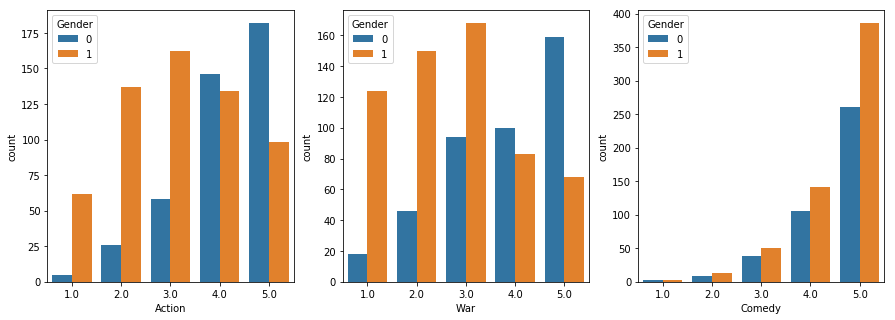

In [268]:
movies1 = data[["Gender","Action","War","Comedy", "Sci-fi", "Western"]].copy()
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5), sharex=True)
sns.countplot(x=movies1["Action"], hue="Gender", data=movies1, ax=ax[0])
sns.countplot(x=movies1["War"], hue="Gender", data=movies1, ax=ax[1])
sns.countplot(x=movies1["Comedy"], hue="Gender", data=movies1, ax=ax[2])

In [269]:
logmodel_movies_coeff.sort_values(by='Coeff',ascending=False).head(5)

,Coeff,Features
4,0.865529,Romantic
0,0.608810,Movies
7,0.400033,Fantasy/Fairy tales
8,0.146245,Animated
2,0.072095,Thriller


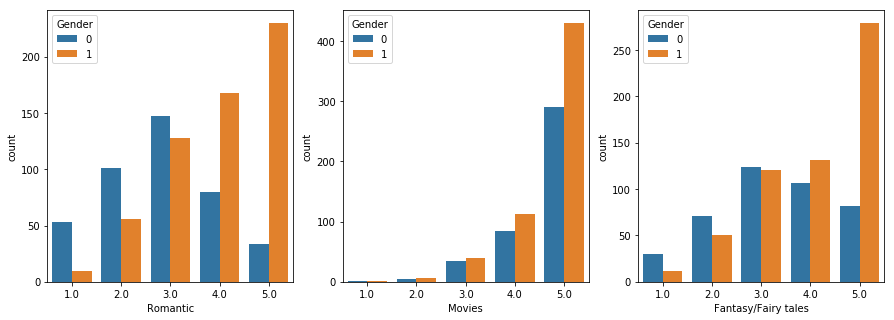

In [270]:
movies2 = raw_data[["Gender","Romantic","Movies","Fantasy/Fairy tales"]].copy()
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(15,5), sharex=True)
sns.countplot(x=movies2["Romantic"], hue="Gender", data=movies2, ax=ax[0])
sns.countplot(x=movies2["Movies"], hue="Gender", data=movies2, ax=ax[1])
sns.countplot(x=movies2["Fantasy/Fairy tales"], hue="Gender", data=movies2, ax=ax[2])

We were able to do Gender prediction on the basis of hobbies,interest and movies preferences with presision of 88% and 81% respectively.

## Artificial Neural Network

Will be predicting gender on the basis of the combination of hobbites and movie preferences together.
The prediction will be done using artificial neural network.

###### We will import our estimator (the Multi-Layer Perceptron Classifier model) from the neural_network library of SciKit-Learn

In [271]:
x_ann = X.join([X_movies])      #joining datasets 

In [272]:
y_ann = Y      # labels column will be same as before i.e Gender column from the dataset

In [273]:
x_train_ann, x_test_ann, y_train_ann, y_test_ann = train_test_split(x_ann, y_ann, test_size=0.20, random_state=100)

In [274]:
scaler_ann = StandardScaler()
# Fit only to the training data
scaler_ann.fit(x_train_ann)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [275]:
# Now apply the transformations to the data:
x_train_ann = scaler_ann.transform(x_train_ann)
x_test_ann = scaler_ann.transform(x_test_ann)

In [276]:
from sklearn.neural_network import MLPClassifier

In [277]:
print(x_ann.shape)      ## Checking the total number of columns in the combined dataset

(1010, 44)


The parameter to be passed for creating the instance of the estimator consist of a tuple. The tuple is populated with the number of neurons that each layer is to be made of. The number of entries in the tuple define the number of layers in the network

Will build a 3 layer neural network with each layer made of the same number of columns as the input dataset(44)

In [278]:
ann = MLPClassifier(hidden_layer_sizes=(44,44,22,22))

In [279]:
#fit the training data 
ann.fit(x_train_ann,y_train_ann)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(44, 44, 22, 22), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [280]:
# make prediction
predict_ann = ann.predict(x_test_ann)

In [281]:
print(classification_report(y_test_ann, predict_ann))

             precision    recall  f1-score   support

          0       0.78      0.90      0.84        77
          1       0.93      0.85      0.89       125

avg / total       0.87      0.87      0.87       202



- The presicion achieved with the total model is 87%.
- The network is better at predicting females(1) with a precision of 94% 

### Conclusion
For the specific dataset taken and corresponding calculation, following observations were made
- High multicollinearity between related columns 
- Most correlation exist between Gender and other columns 
- The correlation values were highest among hobbies columns and movie preferences column
- These columns were further used for predicting gender.
- The Gender prediction was first done using hobbies and interest columns
- The techniques used for the prediction were
    - Logistic Regression
    - Decision Trees
    - Random Forest
    - Support Vector Machine(SVM)
- The highest presision was achieved was with Logistic Regression (88%) followed with SVM(86%)
- Gender prediction was then done on the basis of movie preferences using logistic regression(81%)
- The columns of hobbies and movie preferences were combined for predicting Gender.
- Artificial Neural Network was used for the same
- 4 layer neural network was constructed using MLPClassifier librabry of scikit learn. First two layers consisted of 44 neurons   same as the number of columns as the predictors. The next two layers consist of half the number of neurons.
- The presion achieved with the neural network in predicion was 87%